## Часть 1. Парсинг (10 баллов)

Мы предлагаем вам распарсить часть данных litres.ru — а именно часть про книги, имеющие отношение к программированию.

Они находятся в этом каталоге: https://www.litres.ru/genre/programmirovanie-5272/

Вам нужно собрать датасет о книгах с первых 40-ти страниц каталога (около 960 книг.)
*Подсказка.* Можете начать с исследования html кода этой страницы.

Вам необходимо собрать датасет, содержащий следующие данные:
* name: название книги
* author: автор
* link: ссылка на книгу
* rating: рейтинг по 5-балльной шкале
* rating_count: количество оценок
* review_count: количество отзывов
* pages_count: объем (число страниц)
* price: цена
* text_reviews: тексты отзывов: список строк
* age: возрастное ограничение
* year: год написания

В дальнейшем вам нужно будет анализировать полученный у вас датасет.

Если у вас не получилось спарсить датасет, воспользуйтесь для последующих пунктов готовым датасетом: https://disk.yandex.ru/d/2UZet2-qxRxF6Q

 Так вы сможете получить баллы за вторую часть.

(Датасет неидеален, с ним придется поработать!)

**Парсите "вежливо": используйте time.sleep() не меньше 1-2 секунд между запросами к сайту!**

In [18]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import re
from tqdm import tqdm
import time

In [20]:
# мне хватило сил только на title, age, year, link и pages_count
# я всё умею, но ничего не успеваю(

data_dicts = []

base_link = re.compile('(?<=a data-testid\=\"art__title\" href\=\").+?(?=\" target)')
span_link = re.compile('(?<=\<span\>).+?(?=\<\/span\>)')
title_link = re.compile('(?<=\>).+?(?=\<)')

for i in tqdm(range(1,2)):#range(1,40):
    basic_url = f"https://www.litres.ru/genre/programmirovanie-5272/?page={i}"
    user_agent = UserAgent().chrome 
    response = requests.get(basic_url, headers={'User-Agent':user_agent})
    soup = BeautifulSoup(response.text, 'html.parser')
    posts = soup.find_all('a', {'data-testid': 'art__title'})
    for post in tqdm(posts):
        book_data = dict()

        title_post = post.find_all('p', {'class': 'ArtInfo_title__h_5Ay'})[0]
        book_data['title'] = re.search(title_link, str(title_post))[0]

        book_link = re.search(base_link, str(post))[0]
        book_data['link'] = book_link
        real_page_url = 'https://www.litres.ru' + book_link

        response2 = requests.get(real_page_url, headers={'User-Agent':user_agent})
        soup2 = BeautifulSoup(response2.text, 'html.parser')

        infos = soup.find_all('div', {'class': 'CharacteristicsBlock_characteristic__4pi7v'})
        for info in infos: # добавить try!
            info_key, info_value = re.findall(span_link, str(info))
            if info_key.strip('<!-- -->: ') == 'Возрастное ограничение':
                book_data['age'] = int(info_value.strip('+'))
            elif info_key.strip('<!-- -->: ') == 'Дата написания':
                book_data['year'] = info_value
            elif info_key.strip('<!-- -->: ') == 'Общее кол-во страниц':
                book_data['pages_count'] = int(info_value)

        data_dicts.append(book_data)
        time.sleep(2)

100%|██████████| 1/1 [01:02<00:00, 62.55s/it]


In [21]:
print(data_dicts)

[{'title': 'Изучаем DDD – предметно-ориентированное проектирование', 'link': '/book/vlad-hononov/izuchaem-ddd-predmetno-orientirovannoe-proektirovanie-70920895/'}, {'title': 'Высоконагруженные приложения. Программирование, масштабирование, поддержка (pdf+epub)', 'link': '/book/martin-kleppman-1733/vysokonagruzhennye-prilozheniya-programmirovanie-mass-39100996/'}, {'title': 'Начинаем программировать на Python', 'link': '/book/toni-geddis-32491161/nachinaem-programmirovat-na-python-68998912/'}, {'title': 'System Design. Подготовка к сложному интервью', 'link': '/book/aleks-suy/system-design-podgotovka-k-slozhnomu-intervu-67193183/'}, {'title': 'Нейросети начало', 'link': '/book/dzheyd-karter/neyroseti-nachalo-69188950/'}, {'title': 'Python Библиотеки', 'link': '/book/dzheyd-karter/python-biblioteki-70323379/'}, {'title': 'Информатика. 7 класс. Базовый уровень', 'link': '/book/anna-bosova/informatika-7-klass-68294027/'}, {'title': 'Чистый код: создание, анализ и рефакторинг (pdf+epub)', '

## Часть 2. EDA (30 баллов)

1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?
2. Есть ли в датасете пропуски? (0.5)
3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).
4. Выведите описательные статистики переменных. Ответьте на следующие вопросы:

* Какая медианная цена книги в вашем датасете? (1)  
* Какое возрастное ограничение встречается чаще всего? (1)  
* Какое среднее число отзывов в книге? (1)  
* Сколько книг имеют оценку ниже 4.25? (1)  
* В каком году было написано больше всего книг из датасета? (1)  

5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)

6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

8. Выведите топ-10 книг по числу отзывов. (2).

9. Найдите среднюю длину отзыва (в символах). (2)

10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

12. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

13. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

14. Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Выведите первые 5 строк датасета. (0.25).
df = pd.read_csv('litres_programming_data.csv', index_col=0)
df.head(5)

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023
1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023
3,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019
4,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0+,2021
7,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0+,2020


In [4]:
# Сколько в нём строк и столбцов (0.25)?
print('Строк: ', len(df))
print('Столбцов: ', len(df.loc[0])) 

Строк:  965
Столбцов:  12


In [14]:
# Есть ли в датасете пропуски? (0.5)
nans = False
for col in df.columns:
    if len(df[df[col].isna() == True]) > 1:
        nans = True
print(nans) # видимо нет

False


In [15]:
# Проверьте типы данных.
df.info() # подтверждает, что нет пропущенных значений кстати

<class 'pandas.core.frame.DataFrame'>
Index: 965 entries, 0 to 1197
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             965 non-null    object 
 1   author           965 non-null    object 
 2   link             965 non-null    object 
 3   rating           965 non-null    float64
 4   rating_count     965 non-null    int64  
 5   review_count     965 non-null    int64  
 6   price            965 non-null    float64
 7   pages            965 non-null    object 
 8   pages_count      965 non-null    int64  
 9   text_of_reviews  965 non-null    object 
 10  age              965 non-null    object 
 11  year             965 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 130.3+ KB


In [19]:
# Если это необходимо, приведите к типам int и float те столбцы, 
# с которыми понадобится работать как с числами. (1).

# Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. 
# Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. (1.5)

def age_cleaner(age):
    a = ''
    for s in age:
        if s.isdigit():
            a += s
    if len(a) > 0:
        return int(a)
    else:
        return None

def str_cleaner(page):
    return int(page.split('стр')[0])
    
df['age'] = df['age'].map(age_cleaner)
df['pages'] = df['pages'].map(str_cleaner)

In [20]:
# проверяем что теперь типы норм
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 965 entries, 0 to 1197
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             965 non-null    object 
 1   author           965 non-null    object 
 2   link             965 non-null    object 
 3   rating           965 non-null    float64
 4   rating_count     965 non-null    int64  
 5   review_count     965 non-null    int64  
 6   price            965 non-null    float64
 7   pages            965 non-null    int64  
 8   pages_count      965 non-null    int64  
 9   text_of_reviews  965 non-null    object 
 10  age              965 non-null    int64  
 11  year             965 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 98.0+ KB


In [22]:
# Какое среднее число отзывов в книге? (1)
df['review_count'].mean() 

1.6031088082901555

In [26]:
# Какое возрастное ограничение встречается чаще всего? (1)  
df['review_count'].mode()[0]

0

In [27]:
# В каком году было написано больше всего книг из датасета? (1) 
df['year'].mode()[0]

2021

In [29]:
# Какая медианная цена книги в вашем датасете? (1) 
df['price'].median()

200.0

In [30]:
# Сколько книг имеют оценку ниже 4.25? (1)  
len(df[df['rating']<4.25])

619

In [31]:
# Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 
# и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

is_popular = []
for row in df.iterrows():
    if row[1]['rating'] >= 4.6 and row[1]['review_count'] > 4:
        is_popular.append(1)
    else:
        is_popular.append(0)
df['is_popular'] = is_popular

In [33]:
# Как отличается среднее число страниц среди популярных и непопулярных книг? (2)
print('popular: ', df[df['is_popular']==1]['pages'].mean())
print('not popular: ', df[df['is_popular']==0]['pages'].mean())

popular:  380.90625
not popular:  216.56484458735264


In [34]:
# 8. Выведите топ-10 книг по числу отзывов. (2).
df.sort_values(by='review_count', ascending=False).head(10)

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,is_popular
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102,102,['Книга отличная. Давно хотела понять как все ...,12,2023,1
961,Теоретический минимум по Computer Science. Все...,Владстон Феррейра Фило,https://www.litres.ru/book/vladston-ferreyra-f...,3.9,94,28,599.0,224,224,['Прекрасная книга. Рекомендовал и старшим шко...,16,2017,0
117,#Сам себе программист. Как научиться программи...,Кори Альтхофф,https://www.litres.ru/book/kori-althoff/sam-se...,4.2,128,25,299.0,210,210,"['Отличная книга чтобы начать программировать,...",12,2017,0
857,Нейросети. Обработка естественного языка,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,5.0,377,19,690.0,231,231,['Отличная серия! Обложки просто кайф. Много п...,12,2023,1
605,"Изучаем Python: программирование игр, визуализ...",Эрик Мэтиз,https://www.litres.ru/book/erik-metiz/izuchaem...,4.3,74,18,699.0,512,512,"['Осторожно, под видом второго издания продает...",16,2021,0
648,"Swift. Основы разработки приложений под iOS, i...",Василий Усов,https://www.litres.ru/book/vasiliy-usov/swift-...,3.1,64,17,499.0,545,545,['Книга хорошая. Все подробно описано. Единств...,16,2021,0
107,Облачные технологии. Практическое руководство ...,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/oblac...,5.0,268,17,690.0,212,212,['Автор не перестает радовать годными книгами....,12,2024,1
560,Путь лидера,Джейд Картер,https://www.litres.ru/book/anna-kozlovceva/put...,5.0,173,17,199.0,215,215,['Отличное руководство. Расписан каждый шаг. Д...,12,2023,1
592,Программирование на C++ в примерах и задачах,Алексей Васильев,https://www.litres.ru/book/aleksey-nikolaevich...,4.0,78,16,419.0,369,369,"['Я купил эту книгу в бумажном виде, прочитав ...",12,2017,0
1174,1С:Программирование для начинающих. Детям и ро...,м. г. радченко,https://www.litres.ru/book/m-g-radchenko/1s-pr...,4.0,64,15,550.0,781,781,['Эту книгу я бы рекомендовала самой первой к ...,12,2022,0


In [40]:
# 9. Найдите среднюю длину отзыва (в символах). (2)
all_review_n = 0
all_review_l = 0

for row in df.iterrows():
    reviews = row[1]['text_of_reviews'].strip('[]\"\'').split('\', \'')
    for review in reviews:
        all_review_n += 1
        all_review_l += len(review)
print(all_review_l/all_review_n)

164.9937279498236


In [43]:
# 10. Постройте таблицу корреляций числовых переменных. (1)
x = df[["rating","rating_count", "review_count","price","pages",
        "pages_count", "age", "year", "is_popular"]]
x.corr()

# Прокомментируйте полученные результаты. (1)
# У pages и pages_count корреляция 1, т.к. это одна и та же переменная 
# is_popular и rating_count неплохо (0.57) коррелируют, т.к. мы делали одно исходя из другого
# review_count и rating_count растут вместе, т.к. оба от популярности зависят (у обоих и с is_popular неплохо)

,rating,rating_count,review_count,price,pages,pages_count,age,year,is_popular
rating,1.000000,0.257016,0.402186,0.410324,0.509376,0.509376,0.433156,0.264318,0.197465
rating_count,0.257016,1.000000,0.683794,0.208341,0.135824,0.135824,0.221253,0.160573,0.571547
review_count,0.402186,0.683794,1.000000,0.309463,0.348800,0.348800,0.352973,0.165968,0.435468
price,0.410324,0.208341,0.309463,1.000000,0.639805,0.639805,0.484190,0.428793,0.143033
pages,0.509376,0.135824,0.348800,0.639805,1.000000,1.000000,0.424448,0.201769,0.124267
pages_count,0.509376,0.135824,0.348800,0.639805,1.000000,1.000000,0.424448,0.201769,0.124267
age,0.433156,0.221253,0.352973,0.484190,0.424448,0.424448,1.000000,0.459847,0.143136
year,0.264318,0.160573,0.165968,0.428793,0.201769,0.201769,0.459847,1.000000,0.157431
is_popular,0.197465,0.571547,0.435468,0.143033,0.124267,0.124267,0.143136,0.157431,1.000000


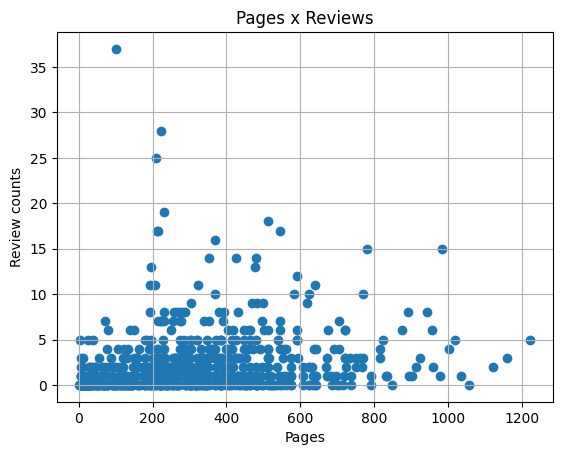

In [45]:
# 11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. 
# Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

fig, ax = plt.subplots()
x = df['pages_count']
y = df['review_count']
ax.scatter(x, y)
ax.grid(True)

plt.title('Pages x Reviews')
plt.xlabel("Pages")
plt.ylabel("Review counts")

plt.show()
# Комментарий: количество комментариев видимо распределено по ~закону Ципфа
# А вот страницы +- распределены нормально
# Корреляции не видно

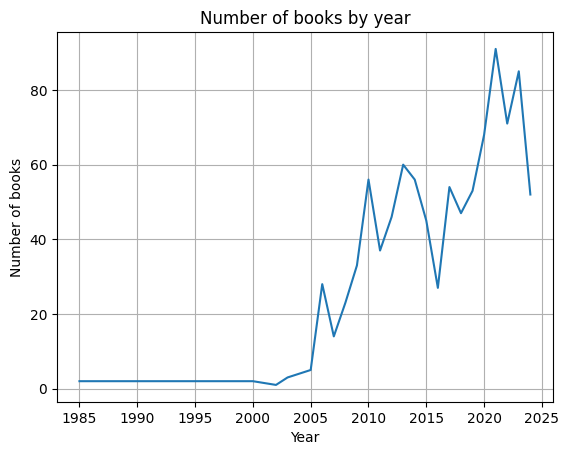

In [59]:
# 12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)
fig, ax = plt.subplots()
dfy = df['year'].value_counts()

x = list(dfy.sort_index().index)
y = dfy.sort_index().values

plt.plot(x, y)
plt.title('Number of books by year')
plt.xlabel("Year")
plt.ylabel("Number of books")
ax.grid(True)
plt.show()
# Видимо в короновирус все очень активно сели писать книги
# За 2024 видимо ещё не всё подгрузили на литрес
# Можно увидеть кризис 2008))
# Что было в 2016 я не помню, я ещё в школе училась, но видимо что-то плохое

In [63]:
# 13. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, 
# средней оценкой книг, средним количеством отзывов. (2).

df.groupby(["author"]).agg({
  "name": "count",
  "rating": "mean",
  "review_count": "mean"
}).reset_index() # видимо пропущенные значения всё же были, но в виде строк "Nulls")))

,author,name,rating,review_count
0,Arsen Gonian,1,5.0,1.0
1,C. И. Никишов,1,4.7,3.0
2,Eugeny Shtoltc,2,2.5,0.0
3,Jade Carter,1,0.0,0.0
4,Nulls,1,4.4,6.0
...,...,...,...,...
725,Ян Пойнтер,1,3.6,2.0
726,а. ф. задорожный,1,0.0,0.0
727,коллектив авторов,5,2.8,0.4
728,м. г. радченко,1,4.0,15.0
